# Obtaining Vacuum Energies and Susceptibilities $\chi$

# Estimating $\epsilon$

In [ ]:
import matplotlib.pyplot as plt
import spec2epsilon
estimates, characterization, plot_data = spec2epsilon.analysis("1mes.csv")


# Vacuum energies and susceptibilities are stored in the characterization DataFrame
display(characterization)

# Inferred epsilons are contained in the estimates DataFrame
display(estimates)

# Data for plotting (emission energies in solution and x = 2 alpha_st - alpha_opt)
display(plot_data)

,E_vac,E_vac_err,chi,chi_err
molecule,,,,
1-Mes,2.895956,0.068306,0.555318,0.064903


,solvent,molecule,epsilon_median,epsilon_lower,epsilon_upper
0,Zeonex,1-Mes,2.617836,2.577227,2.664498
1,PS,1-Mes,2.695899,2.598441,2.864747
2,CBP,1-Mes,4.145885,3.773595,4.538606
3,PMMA,1-Mes,6.668528,5.945356,7.603278


,molecule,solvent,x,emission
0,1-Mes,Ace,1.518460,2.077052
1,1-Mes,CHCl3,0.958710,2.246377
2,1-Mes,CyH,0.333146,2.818182
3,1-Mes,DMF,1.551868,2.009724
4,1-Mes,Diox,0.415401,2.556701
5,1-Mes,EtOAc,1.142110,2.300557
6,1-Mes,THF,1.204893,2.283610
7,1-Mes,Tol,0.433717,2.678186


# Plotting

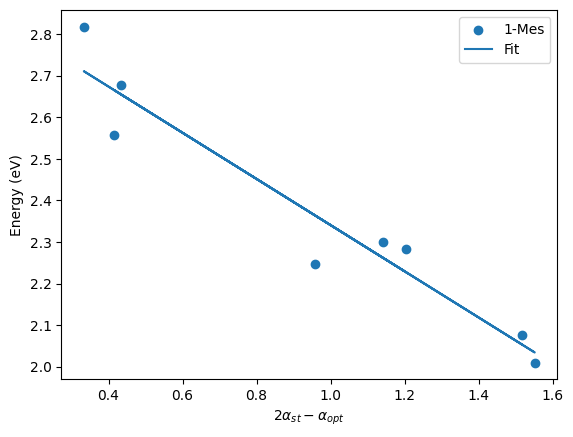

In [15]:
# Choose molecule of interest
mol = '1-Mes'

dfm = plot_data[plot_data["molecule"] == mol]
plt.scatter(dfm["x"], dfm["emission"], label=mol)
xs = dfm["x"].to_numpy()

chi = characterization.loc[mol, "chi"]
E_vac = characterization.loc[mol, "E_vac"]
y_pred = E_vac - chi * xs

plt.plot(xs, y_pred, label="Fit")
plt.xlabel(r"$2\alpha_{st} - \alpha_{opt}$")
plt.ylabel("Energy (eV)")
plt.legend()
plt.show()
